In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import scipy.stats as st

%matplotlib inline

In [2]:
! pip install scipy

In [3]:
clients = pd.read_csv("/Users/admin/Desktop/IRONHACK/5.WEEK/AB_testing/data/raw/df_final_demo.txt")

In [4]:
digi_1 = pd.read_csv("/Users/admin/Desktop/IRONHACK/5.WEEK/AB_testing/data/raw/df_final_web_data_pt_1.txt")

In [5]:
digi_2 = pd.read_csv("/Users/admin/Desktop/IRONHACK/5.WEEK/AB_testing/data/raw/df_final_web_data_pt_2.txt")

In [6]:
experiment = pd.read_csv("/Users/admin/Desktop/IRONHACK/5.WEEK/AB_testing/data/raw/df_final_experiment_clients.txt")

### Client Profiles:

- Demographics like age, gender, and account details of our clients.   

In [7]:
clients.head()

,client_id,clnt_tenure_yr,clnt_tenure_mnth,clnt_age,gendr,num_accts,bal,calls_6_mnth,logons_6_mnth
0,836976,6.0,73.0,60.5,U,2.0,45105.30,6.0,9.0
1,2304905,7.0,94.0,58.0,U,2.0,110860.30,6.0,9.0
2,1439522,5.0,64.0,32.0,U,2.0,52467.79,6.0,9.0
3,1562045,16.0,198.0,49.0,M,2.0,67454.65,3.0,6.0
4,5126305,12.0,145.0,33.0,F,2.0,103671.75,0.0,3.0


**Meaning of variables:**

- `client_id`: Every client’s unique ID.
- `clnt_tenure_yr`: Represents how long the client has been with Vanguard, measured in years.
- `clnt_tenure_mnth`: Further breaks down the client’s tenure with Vanguard in months.
- `clnt_age`:  Indicates the age of the client.
- `gendr`: Specifies the client’s gender.
- `num_accts`: Denotes the number of accounts the client holds with Vanguard.
- `bal`: Gives the total balance spread across all accounts for a particular client.
- `calls_6_mnth`:Records the number of times the client reached out over a call in the past six months.
- `logons_6_mnth`: Reflects the frequency with which the client logged onto Vanguard’s platform over the last six months.  

In [8]:
clients.head()

,client_id,clnt_tenure_yr,clnt_tenure_mnth,clnt_age,gendr,num_accts,bal,calls_6_mnth,logons_6_mnth
0,836976,6.0,73.0,60.5,U,2.0,45105.30,6.0,9.0
1,2304905,7.0,94.0,58.0,U,2.0,110860.30,6.0,9.0
2,1439522,5.0,64.0,32.0,U,2.0,52467.79,6.0,9.0
3,1562045,16.0,198.0,49.0,M,2.0,67454.65,3.0,6.0
4,5126305,12.0,145.0,33.0,F,2.0,103671.75,0.0,3.0


In [9]:
clients.rename(columns={'gendr': 'gender',
                       'num_accts': 'num_account',
                       'bal': 'balance'}, inplace=True)

In [10]:
clients.head()

,client_id,clnt_tenure_yr,clnt_tenure_mnth,clnt_age,gender,num_account,balance,calls_6_mnth,logons_6_mnth
0,836976,6.0,73.0,60.5,U,2.0,45105.30,6.0,9.0
1,2304905,7.0,94.0,58.0,U,2.0,110860.30,6.0,9.0
2,1439522,5.0,64.0,32.0,U,2.0,52467.79,6.0,9.0
3,1562045,16.0,198.0,49.0,M,2.0,67454.65,3.0,6.0
4,5126305,12.0,145.0,33.0,F,2.0,103671.75,0.0,3.0


In [11]:
clients.to_csv('clients.csv', index=False)

### Digital Footprints:
- A detailed trace of client interactions online

In [12]:
digi_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 343141 entries, 0 to 343140
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   client_id     343141 non-null  int64 
 1   visitor_id    343141 non-null  object
 2   visit_id      343141 non-null  object
 3   process_step  343141 non-null  object
 4   date_time     343141 non-null  object
dtypes: int64(1), object(4)
memory usage: 13.1+ MB


In [13]:
digi_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 412264 entries, 0 to 412263
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   client_id     412264 non-null  int64 
 1   visitor_id    412264 non-null  object
 2   visit_id      412264 non-null  object
 3   process_step  412264 non-null  object
 4   date_time     412264 non-null  object
dtypes: int64(1), object(4)
memory usage: 15.7+ MB


In [14]:
web_data = pd.concat([digi_1, digi_2], ignore_index=True)
web_data.head()

,client_id,visitor_id,visit_id,process_step,date_time
0,9988021,580560515_7732621733,781255054_21935453173_531117,step_3,2017-04-17 15:27:07
1,9988021,580560515_7732621733,781255054_21935453173_531117,step_2,2017-04-17 15:26:51
2,9988021,580560515_7732621733,781255054_21935453173_531117,step_3,2017-04-17 15:19:22
3,9988021,580560515_7732621733,781255054_21935453173_531117,step_2,2017-04-17 15:19:13
4,9988021,580560515_7732621733,781255054_21935453173_531117,step_3,2017-04-17 15:18:04


### Client Profiles:


- `visitor_id`: A unique ID for each client-device combination.
- `visit_id`: A unique ID for each web visit/session.
- `process_step`: Marks each step in the digital process.
- `date_time`: Timestamp of each web activity.

In [15]:
web_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 755405 entries, 0 to 755404
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   client_id     755405 non-null  int64 
 1   visitor_id    755405 non-null  object
 2   visit_id      755405 non-null  object
 3   process_step  755405 non-null  object
 4   date_time     755405 non-null  object
dtypes: int64(1), object(4)
memory usage: 28.8+ MB


In [16]:
web_data.head()

,client_id,visitor_id,visit_id,process_step,date_time
0,9988021,580560515_7732621733,781255054_21935453173_531117,step_3,2017-04-17 15:27:07
1,9988021,580560515_7732621733,781255054_21935453173_531117,step_2,2017-04-17 15:26:51
2,9988021,580560515_7732621733,781255054_21935453173_531117,step_3,2017-04-17 15:19:22
3,9988021,580560515_7732621733,781255054_21935453173_531117,step_2,2017-04-17 15:19:13
4,9988021,580560515_7732621733,781255054_21935453173_531117,step_3,2017-04-17 15:18:04


In [17]:
web_data.shape

(755405, 5)

In [18]:
duplicados = web_data.duplicated().sum()
duplicados

10764

In [19]:
web_data = web_data.drop_duplicates()

In [20]:
web_data.shape

(744641, 5)

In [21]:
web_data.to_csv('web_data.csv', index=False)

## Experiment Roster
- A list revealing which clients were part of the grand experiment.

- `client_id`: Every client’s unique ID.
- `variation`:Indicates if a client was part of the experiment.

In [22]:
experiment.head()

,client_id,Variation
0,9988021,Test
1,8320017,Test
2,4033851,Control
3,1982004,Test
4,9294070,Control


In [23]:
experiment['Variation'].value_counts()

Variation
Test       26968
Control    23532
Name: count, dtype: int64

In [24]:
experiment.shape

(70609, 2)

- `Control Group`: Clients interacted with Vanguard’s traditional online process.
- `Test Group`: Clients experienced the new, spruced-up digital interface.

In [25]:
#fill nan values with client that no participate:
experiment['Variation'] = experiment['Variation'].fillna('No participate')

In [26]:
experiment['Variation'].value_counts()

Variation
Test              26968
Control           23532
No participate    20109
Name: count, dtype: int64

In [27]:
experiment.rename(columns={'Variation': 'variation'}, inplace=True)

In [28]:
experiment.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70609 entries, 0 to 70608
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   client_id  70609 non-null  int64 
 1   variation  70609 non-null  object
dtypes: int64(1), object(1)
memory usage: 1.1+ MB


In [29]:
experiment.to_csv('experiment.csv', index=False)

### Day 1: Answered the following questions about demographics:

- Who are the primary clients using this online process?
- Are the primary clients younger or older, new or long-standing?

1. Who are the primary clients using this online process?

We consider primary clients to be those who have been with Vanguards for the longest period of time in years and those who have a higher balance than other clients. 


In [30]:
df_year = clients.sort_values(by='clnt_tenure_yr', ascending=[False]).head(100)
df_year.head()

,client_id,clnt_tenure_yr,clnt_tenure_mnth,clnt_age,gender,num_account,balance,calls_6_mnth,logons_6_mnth
64690,357409,62.0,749.0,51.0,F,2.0,317681.78,4.0,4.0
12871,3271450,55.0,669.0,48.5,M,4.0,219932.98,0.0,3.0
56608,6743983,55.0,668.0,46.0,F,2.0,962741.20,6.0,6.0
30335,7616896,55.0,669.0,78.0,U,2.0,45780.56,5.0,8.0
11329,4833584,55.0,669.0,45.0,M,4.0,718973.76,6.0,9.0


In [31]:
df_balance = clients.sort_values(by='balance', ascending=[False]).head(100)
df_balance.head()

,client_id,clnt_tenure_yr,clnt_tenure_mnth,clnt_age,gender,num_account,balance,calls_6_mnth,logons_6_mnth
39367,9286288,21.0,254.0,62.5,M,3.0,16320040.15,6.0,9.0
63746,8339240,6.0,80.0,26.5,M,2.0,12838418.01,3.0,3.0
23849,7070097,11.0,133.0,53.0,M,2.0,8986419.77,6.0,9.0
13318,9440656,7.0,94.0,63.0,F,2.0,8292996.21,6.0,9.0
2171,2291985,7.0,85.0,41.0,M,2.0,8247729.97,1.0,4.0


### Primary clients 

In [32]:
primary_clients = pd.concat([df_year, df_balance], ignore_index=True)
primary_clients

,client_id,clnt_tenure_yr,clnt_tenure_mnth,clnt_age,gender,num_account,balance,calls_6_mnth,logons_6_mnth
0,357409,62.0,749.0,51.0,F,2.0,317681.78,4.0,4.0
1,3271450,55.0,669.0,48.5,M,4.0,219932.98,0.0,3.0
2,6743983,55.0,668.0,46.0,F,2.0,962741.20,6.0,6.0
3,7616896,55.0,669.0,78.0,U,2.0,45780.56,5.0,8.0
4,4833584,55.0,669.0,45.0,M,4.0,718973.76,6.0,9.0
...,...,...,...,...,...,...,...,...,...
195,9893446,29.0,353.0,65.0,M,3.0,3193269.83,6.0,9.0
196,2976295,22.0,267.0,49.5,M,3.0,3191837.41,7.0,7.0
197,4473931,27.0,335.0,65.5,F,3.0,3191769.31,3.0,7.0
198,8286876,27.0,327.0,57.5,F,3.0,3189564.50,6.0,9.0


In [33]:
primary_clients.head()

,client_id,clnt_tenure_yr,clnt_tenure_mnth,clnt_age,gender,num_account,balance,calls_6_mnth,logons_6_mnth
0,357409,62.0,749.0,51.0,F,2.0,317681.78,4.0,4.0
1,3271450,55.0,669.0,48.5,M,4.0,219932.98,0.0,3.0
2,6743983,55.0,668.0,46.0,F,2.0,962741.20,6.0,6.0
3,7616896,55.0,669.0,78.0,U,2.0,45780.56,5.0,8.0
4,4833584,55.0,669.0,45.0,M,4.0,718973.76,6.0,9.0


2. Are the primary clients younger or older, new or long-standing?

In [34]:
def age_classification(age):
    if age >= 18.0 and age <= 30.0:
        return 'young'
    elif age >= 31.0 and age <= 50.0:
        return 'adult'
    else:
        return 'old'

In [35]:
# Aplicar la función a la columna 'clnt_age' para crear una nueva columna 'edad_grupo'
primary_clients['age_group'] = primary_clients['clnt_age'].apply(age_classification)

In [36]:
primary_clients.head()

,client_id,clnt_tenure_yr,clnt_tenure_mnth,clnt_age,gender,num_account,balance,calls_6_mnth,logons_6_mnth,age_group
0,357409,62.0,749.0,51.0,F,2.0,317681.78,4.0,4.0,old
1,3271450,55.0,669.0,48.5,M,4.0,219932.98,0.0,3.0,adult
2,6743983,55.0,668.0,46.0,F,2.0,962741.20,6.0,6.0,adult
3,7616896,55.0,669.0,78.0,U,2.0,45780.56,5.0,8.0,old
4,4833584,55.0,669.0,45.0,M,4.0,718973.76,6.0,9.0,adult


In [37]:
primary_clients['age_group'].value_counts()

age_group
old      154
adult     43
young      3
Name: count, dtype: int64

The primary clients are mostly older.

In [38]:
def get_tenure_year(tenure):
    if tenure >= 0.0 and tenure <= 10.0:
        return 'new standing'
    elif tenure >= 11.0 and tenure <= 20.0:
        return 'mid standing'
    else:
        return 'long standing'

In [39]:
# Aplicar la función a la columna 'clnt_age' para crear una nueva columna 'edad_grupo'
primary_clients['tenure_group'] = primary_clients['clnt_tenure_yr'].apply(get_tenure_year)

In [40]:
primary_clients.to_csv('primary_clients.csv', index=False)

In [41]:
primary_clients.head()

,client_id,clnt_tenure_yr,clnt_tenure_mnth,clnt_age,gender,num_account,balance,calls_6_mnth,logons_6_mnth,age_group,tenure_group
0,357409,62.0,749.0,51.0,F,2.0,317681.78,4.0,4.0,old,long standing
1,3271450,55.0,669.0,48.5,M,4.0,219932.98,0.0,3.0,adult,long standing
2,6743983,55.0,668.0,46.0,F,2.0,962741.20,6.0,6.0,adult,long standing
3,7616896,55.0,669.0,78.0,U,2.0,45780.56,5.0,8.0,old,long standing
4,4833584,55.0,669.0,45.0,M,4.0,718973.76,6.0,9.0,adult,long standing


In [42]:
pivot_table_pclients = primary_clients.pivot_table(index='tenure_group', columns='age_group', aggfunc='size', fill_value=0)
pivot_table_pclients

age_group,adult,old,young
tenure_group,,,
long standing,31,123,2
mid standing,6,24,0
new standing,6,7,1


### MERGE DATAFRAME WITH TEST Y CONTROL

In [43]:
merge_df = pd.merge(web_data, experiment, on='client_id', how='left')
merge_df

,client_id,visitor_id,visit_id,process_step,date_time,variation
0,9988021,580560515_7732621733,781255054_21935453173_531117,step_3,2017-04-17 15:27:07,Test
1,9988021,580560515_7732621733,781255054_21935453173_531117,step_2,2017-04-17 15:26:51,Test
2,9988021,580560515_7732621733,781255054_21935453173_531117,step_3,2017-04-17 15:19:22,Test
3,9988021,580560515_7732621733,781255054_21935453173_531117,step_2,2017-04-17 15:19:13,Test
4,9988021,580560515_7732621733,781255054_21935453173_531117,step_3,2017-04-17 15:18:04,Test
...,...,...,...,...,...,...
744636,9668240,388766751_9038881013,922267647_3096648104_968866,start,2017-05-24 18:46:10,NaN
744637,9668240,388766751_9038881013,922267647_3096648104_968866,start,2017-05-24 18:45:29,NaN
744638,9668240,388766751_9038881013,922267647_3096648104_968866,step_1,2017-05-24 18:44:51,NaN
744639,9668240,388766751_9038881013,922267647_3096648104_968866,start,2017-05-24 18:44:34,NaN


In [44]:
merge_df['variation'].unique()

array(['Test', 'Control', nan, 'No participate'], dtype=object)

In [45]:
#Separamos los df segun test y creamos un df_test
df_test = merge_df.loc[merge_df['variation'] == 'Test']
df_test

,client_id,visitor_id,visit_id,process_step,date_time,variation
0,9988021,580560515_7732621733,781255054_21935453173_531117,step_3,2017-04-17 15:27:07,Test
1,9988021,580560515_7732621733,781255054_21935453173_531117,step_2,2017-04-17 15:26:51,Test
2,9988021,580560515_7732621733,781255054_21935453173_531117,step_3,2017-04-17 15:19:22,Test
3,9988021,580560515_7732621733,781255054_21935453173_531117,step_2,2017-04-17 15:19:13,Test
4,9988021,580560515_7732621733,781255054_21935453173_531117,step_3,2017-04-17 15:18:04,Test
...,...,...,...,...,...,...
629299,1574008,117364417_77840596075,528720790_71583064618_169151,confirm,2017-05-06 23:51:05,Test
629300,1574008,117364417_77840596075,528720790_71583064618_169151,step_3,2017-05-06 23:50:40,Test
629301,1574008,117364417_77840596075,528720790_71583064618_169151,step_2,2017-05-06 23:43:47,Test
629302,1574008,117364417_77840596075,528720790_71583064618_169151,step_1,2017-05-06 23:43:34,Test


In [46]:
df_test.shape

(176699, 6)

In [47]:
df_test = df_test.drop_duplicates()

In [48]:
df_test.shape

(176699, 6)

In [49]:
#Separamos los df segun control y creamos un df_control
df_control = merge_df.loc[merge_df['variation'] == 'Control']
df_control

,client_id,visitor_id,visit_id,process_step,date_time,variation
13,4033851,762728880_76361333336,949661017_22392791362_127391,confirm,2017-04-05 12:29:03,Control
14,4033851,762728880_76361333336,949661017_22392791362_127391,confirm,2017-04-05 12:29:01,Control
15,4033851,762728880_76361333336,949661017_22392791362_127391,confirm,2017-04-05 12:28:52,Control
16,4033851,762728880_76361333336,949661017_22392791362_127391,step_3,2017-04-05 12:26:08,Control
17,4033851,762728880_76361333336,949661017_22392791362_127391,step_2,2017-04-05 12:24:43,Control
...,...,...,...,...,...,...
629289,433098,5505424_50616523266,773565250_67577573147_389841,start,2017-05-13 15:30:47,Control
629346,2908510,814969699_90652851448,562606085_36368381773_92090,start,2017-05-10 22:57:17,Control
629347,2908510,814969699_90652851448,562606085_36368381773_92090,step_2,2017-05-10 22:56:31,Control
629348,2908510,814969699_90652851448,562606085_36368381773_92090,step_1,2017-05-10 22:56:23,Control


In [50]:
df_control.shape

(140536, 6)

## Performance Metrics

1. Completion Rate: The proportion of users who reach the final ‘confirm’ step.

### DF TEST

In [51]:
confirmed_users = df_test[df_test['process_step'] == 'confirm']

In [52]:
#number of client_id that confirm the process

In [53]:
unique_user_test = df_test['client_id'].unique()

In [54]:
num_confimed_users = len(confirmed_users)
num_confimed_users

25600

In [55]:
#number of unique client_id that confirm the process

In [56]:
unique_user = len(confirmed_users['client_id'].unique())
unique_user

18687

In [57]:
completion_rate_test = len(confirmed_users)/ len(unique_user_test) * 100
round_result  = round(completion_rate_test,2)

print(f"The completion rate is: {round_result}", "%")

The completion rate is: 94.93 %


In [58]:
len(confirmed_users)

25600

In [59]:
len(unique_user_test)

26968

### DF Control

In [60]:
confirmed_users_control = df_control[df_control['process_step'] == 'confirm']

In [61]:
confirmed_users_control.shape

(17336, 6)

In [62]:
unique_user_control = df_control['client_id'].unique()

In [63]:
num_confimed_users_control = len(confirmed_users_control)
num_confimed_users_control

17336

In [64]:
len(confirmed_users_control)

17336

In [65]:
len(confirmed_users_control)

17336

In [66]:
len(unique_user_test)
len(confirmed_users)
len(confirmed_users_control)
len(unique_user_control)

23532

In [67]:
len(unique_user_control)

23532

In [68]:
completion_rate_control = len(confirmed_users_control)/ len(unique_user_control) * 100
print(f"The completion rate is: {completion_rate_control}")

The completion rate is: 73.66989631140575


In [69]:
round_result_  = round(completion_rate_control,2)

print(f"The completion rate is: {round_result}", "%")

The completion rate is: 94.93 %


- `Completion rate for control`: 73.67 %
- `Completion rate for test`: 94.93 %

### 2. Time Spent on Each Step: The average duration users spend on each step.

#### DF CONTROL

In [70]:
df_control['date_time'] = pd.to_datetime(df_control['date_time'])

/var/folders/k_/v5fd001j3bsfqngvdgmg9dg40000gn/T/ipykernel_3797/1586962168.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_control['date_time'] = pd.to_datetime(df_control['date_time'])


In [71]:
# Ordenar el DataFrame por 'client_id' y 'date_time' para garantizar que los registros estén en el orden correcto
df_control = df_control.sort_values(by=['client_id', 'date_time'])

# Calcular la diferencia de tiempo entre cada registro consecutivo para cada usuario
df_control['duration'] = (df_control['date_time'] - df_control.groupby('client_id')['date_time'].shift()).dt.total_seconds()

# Ajustar la duración para el primer registro de cada usuario, estableciendo la diferencia de tiempo en 0
df_control.loc[df_control['client_id'] != df_control['client_id'].shift(), 'duration'] = 0

In [72]:
# Calculate the average time in each step
average_time_per_step = df_control.groupby('process_step')['duration'].mean().round(2)

# Imprimir el resultado
print("Average time in each step in minutes:")
print(average_time_per_step/60)

Average time in each step in minutes:
process_step
confirm    1109.610333
start      3268.098500
step_1       30.679500
step_2        0.658333
step_3        9.699500
Name: duration, dtype: float64


In [73]:
avg_time_control = pd.DataFrame(list(average_time_per_step.items()), columns=['Step', 'Average Time'])
# Asignar la columna 'Test' con el valor 'test' a todos
avg_time_control['Group'] = 'Control'

In [74]:
avg_time_control

,Step,Average Time,Group
0,confirm,66576.62,Control
1,start,196085.91,Control
2,step_1,1840.77,Control
3,step_2,39.50,Control
4,step_3,581.97,Control


#### DF TEST

In [75]:
df_test['date_time'] = pd.to_datetime(df_test['date_time'])

In [76]:
# Ordenar el DataFrame por 'client_id' y 'date_time' para garantizar que los registros estén en el orden correcto
df_test = df_test.sort_values(by=['client_id', 'date_time'])

# Calcular la diferencia de tiempo entre cada registro consecutivo para cada usuario
df_test['duration'] = (df_test['date_time'] - df_test.groupby('client_id')['date_time'].shift()).dt.total_seconds()

# Ajustar la duración para el primer registro de cada usuario, estableciendo la diferencia de tiempo en 0
df_test.loc[df_test['client_id'] != df_test['client_id'].shift(), 'duration'] = 0

In [77]:
# Calculate the average time in each step
average_time_per_step_test = df_test.groupby('process_step')['duration'].mean().round(2)

# Imprimir el resultado
print("Average time in each step in minutes:")
print(average_time_per_step_test)

Average time in each step in minutes:
process_step
confirm    104008.52
start      144390.88
step_1       1340.26
step_2        111.51
step_3        741.96
Name: duration, dtype: float64


In [78]:
avg_time_test = pd.DataFrame(list(average_time_per_step_test.items()), columns=['Step', 'Average Time'])
# Asignar la columna 'Test' con el valor 'test' a todos
avg_time_test['Group'] = 'Test'
avg_time_test

,Step,Average Time,Group
0,confirm,104008.52,Test
1,start,144390.88,Test
2,step_1,1340.26,Test
3,step_2,111.51,Test
4,step_3,741.96,Test


In [79]:
time_group = pd.concat([avg_time_test, avg_time_control], ignore_index=True)
time_group

,Step,Average Time,Group
0,confirm,104008.52,Test
1,start,144390.88,Test
2,step_1,1340.26,Test
3,step_2,111.51,Test
4,step_3,741.96,Test
5,confirm,66576.62,Control
6,start,196085.91,Control
7,step_1,1840.77,Control
8,step_2,39.50,Control
9,step_3,581.97,Control


In [80]:
time_group.to_csv('time_group.csv', index=False)

3. Error Rates: If there’s a step where users go back to a previous step, it may indicate confusion or an error. You should consider moving from a later step to an earlier one as an error.

#### DF CONTROL

In [81]:
df_control.head()

,client_id,visitor_id,visit_id,process_step,date_time,variation,duration
131606,1028,42237450_62128060588,557292053_87239438319_391157,start,2017-04-08 18:51:28,Control,0.0
131605,1028,42237450_62128060588,557292053_87239438319_391157,step_1,2017-04-08 18:52:17,Control,49.0
131604,1028,42237450_62128060588,557292053_87239438319_391157,step_1,2017-04-08 18:53:20,Control,63.0
131603,1028,42237450_62128060588,557292053_87239438319_391157,step_2,2017-04-08 18:53:29,Control,9.0
131602,1028,42237450_62128060588,557292053_87239438319_391157,step_3,2017-04-08 18:58:04,Control,275.0


In [82]:
df_control['process_step'].unique()

array(['start', 'step_1', 'step_2', 'step_3', 'confirm'], dtype=object)

In [83]:
#Crear una columna para cada process_step
def assign_value(step):
    if step == 'start':
        return 0
    elif step == 'step_1':
        return 1
    elif step == 'step_2':
        return 2
    elif step == 'step_3':
        return 3
    elif step == 'confirm':
        return 4
    else:
        return 'none'

In [84]:
df_control['step_values'] = df_control['process_step'].apply(assign_value)

In [85]:
df_control['step_values'].unique()

array([0, 1, 2, 3, 4])

In [86]:
# Calcular la diferencia entre 'step_values' y 'visitor_id' dentro de cada grupo definido por 'process_numeric'
#df_test['step_visitor_diff'] = df_test[df_test['step_values'] != 0].groupby(['client_id', 'visitor_id', 'visit_id'])['step_values'].diff()

df_control['step_visitor_diff'] = df_control.sort_values(['client_id', 'visitor_id', 'visit_id'], ascending=True).groupby(['client_id', 'visitor_id', 'visit_id'])['step_values'].diff()

# diff() diferencia entre valores consecutivos dentro de cada grupo definido por 'client_id', 'visitor_id' y 'visit_id'. 
#Esto es lo que te permite obtener la diferencia entre 'step_values' dentro de cada grupo.
#diferencia entre el valor actual de 'step_values' y el valor anterior en esa secuencia

In [87]:
df_control.head()

,client_id,visitor_id,visit_id,process_step,date_time,variation,duration,step_values,step_visitor_diff
131606,1028,42237450_62128060588,557292053_87239438319_391157,start,2017-04-08 18:51:28,Control,0.0,0,NaN
131605,1028,42237450_62128060588,557292053_87239438319_391157,step_1,2017-04-08 18:52:17,Control,49.0,1,1.0
131604,1028,42237450_62128060588,557292053_87239438319_391157,step_1,2017-04-08 18:53:20,Control,63.0,1,0.0
131603,1028,42237450_62128060588,557292053_87239438319_391157,step_2,2017-04-08 18:53:29,Control,9.0,2,1.0
131602,1028,42237450_62128060588,557292053_87239438319_391157,step_3,2017-04-08 18:58:04,Control,275.0,3,1.0


In [88]:
df_control['step_visitor_diff']

131606    NaN
131605    1.0
131604    0.0
131603    1.0
131602    1.0
         ... 
118839    1.0
118838    1.0
118836    0.0
118837    1.0
118473    NaN
Name: step_visitor_diff, Length: 140536, dtype: float64

In [89]:
# Identificar los errores donde la diferencia es negativa
errors = df_control['step_visitor_diff'][df_control['step_visitor_diff'] < 0].count().sum()
errors

9581

In [90]:
# Calcular el número total de transiciones
total_transitions = df_control['step_values'].count() - 1

In [91]:
# Calcular la tasa de errores
error_rate = (errors / total_transitions) * 100

print("Error rate for control group:", error_rate)

Error rate for control group: 6.817518767566797


In [92]:
error_rate_rounded = round(error_rate, 2)

print("Error rate for control group:", error_rate_rounded, "%")

Error rate for control group: 6.82 %


### DF TEST

In [93]:
df_test['step_values'] = df_test['process_step'].apply(assign_value)
df_test.head()

,client_id,visitor_id,visit_id,process_step,date_time,variation,duration,step_values
71583,555,402506806_56087378777,637149525_38041617439_716659,start,2017-04-15 12:57:56,Test,0.0,0
71582,555,402506806_56087378777,637149525_38041617439_716659,step_1,2017-04-15 12:58:03,Test,7.0,1
71581,555,402506806_56087378777,637149525_38041617439_716659,step_2,2017-04-15 12:58:35,Test,32.0,2
71580,555,402506806_56087378777,637149525_38041617439_716659,step_3,2017-04-15 13:00:14,Test,99.0,3
71579,555,402506806_56087378777,637149525_38041617439_716659,confirm,2017-04-15 13:00:34,Test,20.0,4


In [94]:
df_test['step_values'].unique()

array([0, 1, 2, 3, 4])

In [95]:
# Calcular la diferencia entre 'step_values' y 'visitor_id' dentro de cada grupo definido por 'process_numeric'
df_test['step_visitor_diff'] = df_test.groupby(['client_id', 'visitor_id', 'visit_id'])['step_values'].diff()

In [96]:
# Identificar los errores donde la diferencia es negativa
errors = df_test['step_visitor_diff'][df_test['step_visitor_diff'] < 0].count().sum()
errors

16232

In [97]:
# Calcular el número total de transiciones
total_transitions_test = df_test['step_values'].count() - 1

In [98]:
# Calcular la tasa de errores
error_rate = (errors / total_transitions_test) * 100

print("Error rate for test group:", error_rate)

Error rate for test group: 9.186295260840529


In [99]:
# Redondear el valor de la tasa de errores y mostrar solo dos números decimales
error_rate_rounded = round(error_rate, 2)

print("Error rate for test group:", error_rate_rounded, "%")

Error rate for test group: 9.19 %


- `Error rate for test group`: 9.19%
- `Error rate for control group`: 6.82 %

#### Redesign Outcome
Based on the chosen KPIs, how does the new design’s performance compare to the old one?

Based on the provided key performance indicators (KPIs), the new design appears to outperform the old one in certain aspects:

**1. Completion Rate:** The completion rate for the test group is significantly higher (94.93%) compared to the control group (73.67%). This indicates that the new design likely streamlines the process or enhances user experience, leading to more users successfully reaching the final step.

**2. Time Spent on Each Step:** While the time spent on the "start" step is slightly lower in the test group, indicating potential efficiency gains, the time spent on the "confirm" step is notably higher. However, this increase in time might be attributed to users taking more care or engaging more with the process due to improved design elements or clearer instructions.

**3. Error Rates**: The error rate for the test group (9.19%) is higher than that of the control group (6.82%). This could suggest that there are some aspects of the new design that may cause confusion or difficulty for users, leading to more errors. It's essential to investigate further to identify these potential pain points and address them to improve overall user experience.

In summary, the new design shows promising results with a significantly higher completion rate, potentially improved efficiency in certain steps, but also a slightly higher error rate. Further analysis and user feedback may be necessary to pinpoint areas for further optimization, ensuring that the new design maximizes user satisfaction and task completion.

### Hypothesis Testing

1. Confirmed if the difference in completion rate of the the new design and the old design is statistically significant.
2. Carried out an analysis ensuring that the observed increase in completion rate from the A/B test meets or exceeds this 5% threshold.
3. Carried out another hypothesis test of your choosing.
4. Evaluated the experiment by answering questions relating to:
   -  Design Effectiveness
   - Duration
   - Additional Data Needs

**1. Confirmed if the difference in completion rate of the the new design and the old design is statistically significant.**

##### Set Hypothesis

In [100]:
#Set the hypothesis

#H0: The completion rate for the Test group (new design) is equal to the completion rate for the Control group (old design).
#H1: The completion rate for the Test group (new design) is not equal to the completion rate for the Control group (old design).


In [101]:
alpha = 0.05

In [102]:
merge_df['variation'].unique()

array(['Test', 'Control', nan, 'No participate'], dtype=object)

In [103]:
# Change column type to datetime.
merge_df['date_time'] = pd.to_datetime(merge_df['date_time'])

# Delete rows with NaN in column 'variation'.
merge_df.dropna(inplace=True)

# Delete rows with category 'Not participate' in column 'variation'.
merge_df = merge_df[merge_df['variation'] != 'Not participate']

In [104]:
# Filter the data for the categories 'start' and 'confirm'.
filtered_df = merge_df[merge_df['process_step'].isin(['start', 'confirm'])]

# Sort the DataFrame filtered by 'client_id', 'visit_id' and 'date_time'.
filtered_df_sorted = filtered_df.sort_values(by=['client_id', 'visit_id', 'date_time'])

In [105]:
# Calculate the time difference in seconds between adjacent steps.
time_diff_seconds = filtered_df_sorted.groupby(['client_id', 'visit_id'])['date_time'].diff().dt.total_seconds()

In [106]:
# Filter the DataFrame for rows where the current step is 'confirm'.
confirm_time_diff_seconds = time_diff_seconds[filtered_df_sorted['process_step'] == 'confirm'].tolist()

In [107]:
#  Filter by variation category where the process step is confirm.
confirm_time_test = time_diff_seconds[(filtered_df_sorted['process_step'] == 'confirm') & (filtered_df_sorted['variation'].isin(['Test']))].tolist()

In [108]:
confirm_time_control = time_diff_seconds[(filtered_df_sorted['process_step'] == 'confirm') & (filtered_df_sorted['variation'].isin(['Control']))].tolist()

In [109]:
# Delete the Nans.
confirm_time_control = [x for x in confirm_time_control if not pd.isna(x)]
confirm_time_test = [x for x in confirm_time_test if not pd.isna(x)]

In [110]:

# Try hypothesis.
_,p_value = st.ttest_ind(confirm_time_control,confirm_time_test)

print(f"The p value is: {p_value}")

if p_value > alpha:
    print("The results is that: We are not able to reject the null hypothesis")
else:
    print("The results is that: We reject the null hypothesis")

The p value is: 4.411876643501144e-24
The results is that: We reject the null hypothesis


**2. Carried out an analysis ensuring that the observed increase in completion rate from the A/B test meets or exceeds this 5% threshold.**

The introduction of a new UI design comes with its associated costs: design, development, testing, potential training for staff, and possible short-term disruptions or adjustments for users. To justify these costs, Vanguard has determined that any new design should lead to a minimum increase in the completion rate to be deemed cost-effective.

Threshold: Vanguard has set this minimum increase in completion rate at 5%. This is the rate at which the projected benefits, in terms of increased user engagement and potential revenue, are estimated to outweigh the costs of the new design.

You are required to carry out another analysis, ensuring that the observed increase in completion rate from the A/B test meets or exceeds this 5% threshold. If the new design doesn’t lead to at least this level of improvement, it may not be justifiable from a cost perspective, regardless of its statistical significance.

In [111]:
confirm_time_test_ = [x * 1.05 for x in confirm_time_test]

In [112]:
confirm_time_test_ = [x for x in confirm_time_control if not pd.isna(x)]
confirm_time_control = [x for x in confirm_time_test if not pd.isna(x)]

In [113]:
_,p_value = st.ttest_ind(confirm_time_test_,confirm_time_control)

print(f"The p value is: {p_value}")

if p_value > alpha:
    print("The results is that: We are not able to reject the null hypothesis")
else:
    print("The results is that: We reject the null hypothesis")

The p value is: 4.411876643501144e-24
The results is that: We reject the null hypothesis


Based on the statistical analysis and the t-test result, the observed increase in the A/B completion rate is not only statistically significant, but also meets or exceeds the 5% threshold set by Vanguard. Therefore, the implementation of the new design can be justified from a cost-benefit perspective.

#### Hypothesis Testing 
- Choose hypothesis:

You might want to test whether the average age of clients engaging with the new process is the same as those engaging with the old process

In [114]:
#Set the hypothesis

#H0: the average age of clients engaging with the new process are different as those engaging with the old process
#H1: the average age of clients engaging with the new process is the same as those engaging with the old process


##### Choose significance level

In [115]:
alpha = 0.05

In [116]:
merge_cl_exp = pd.merge(clients, experiment, on='client_id', how='left')
merge_cl_exp

,client_id,clnt_tenure_yr,clnt_tenure_mnth,clnt_age,gender,num_account,balance,calls_6_mnth,logons_6_mnth,variation
0,836976,6.0,73.0,60.5,U,2.0,45105.30,6.0,9.0,Test
1,2304905,7.0,94.0,58.0,U,2.0,110860.30,6.0,9.0,Control
2,1439522,5.0,64.0,32.0,U,2.0,52467.79,6.0,9.0,Test
3,1562045,16.0,198.0,49.0,M,2.0,67454.65,3.0,6.0,Test
4,5126305,12.0,145.0,33.0,F,2.0,103671.75,0.0,3.0,Control
...,...,...,...,...,...,...,...,...,...,...
70604,7993686,4.0,56.0,38.5,U,3.0,1411062.68,5.0,5.0,No participate
70605,8981690,12.0,148.0,31.0,M,2.0,101867.07,6.0,6.0,No participate
70606,333913,16.0,198.0,61.5,F,2.0,40745.00,3.0,3.0,No participate
70607,1573142,21.0,255.0,68.0,M,3.0,475114.69,4.0,4.0,No participate


In [117]:
age_control = merge_cl_exp[merge_cl_exp["variation"]=="Control"]["clnt_age"].dropna()

In [118]:
age_test = merge_cl_exp[merge_cl_exp["variation"]=="Test"]["clnt_age"].dropna()

In [119]:
import scipy.stats as stats

# test t de Student for two samples
t_statistic, p_value = stats.ttest_ind(age_control, age_test, equal_var=False)

In [120]:
# Imprimir el resultado de la prueba de hipótesis
print("t-statistic:", t_statistic)
print("p-value:", p_value)

# Comprobar si rechazamos o no la hipótesis nula
if p_value > alpha:
    print("We are not able to reject the null hypothesis")
else:
    print("We reject the null hypotesis")

t-statistic: 2.416068061200627
p-value: 0.015692719461388675
We reject the null hypotesis


#### Experiment Evaluation

You are also required to carry out an evaluation of the experiment by answering questions about the design effectiveness, duration and any additional data needs. See the full details below:

1. Design Effectiveness
- Was the experiment well-structured?
- Were clients randomly and equally divided between the old and new designs?
- Were there any biases?

2. Duration Assessment
- Was the timeframe of the experiment (from 3/15/2017 to 6/20/2017) adequate to gather meaningful data and insights?

3. Additional Data Needs
- What other data, if available, could enhance the analysis?

In [121]:
merge_cl_exp.head()

,client_id,clnt_tenure_yr,clnt_tenure_mnth,clnt_age,gender,num_account,balance,calls_6_mnth,logons_6_mnth,variation
0,836976,6.0,73.0,60.5,U,2.0,45105.30,6.0,9.0,Test
1,2304905,7.0,94.0,58.0,U,2.0,110860.30,6.0,9.0,Control
2,1439522,5.0,64.0,32.0,U,2.0,52467.79,6.0,9.0,Test
3,1562045,16.0,198.0,49.0,M,2.0,67454.65,3.0,6.0,Test
4,5126305,12.0,145.0,33.0,F,2.0,103671.75,0.0,3.0,Control


**1. Design Effectiveness**

- Was the experiment well-structured?
- Were clients randomly and equally divided between the old and new designs?
- Were there any biases?

#### Analysis of Samples

#### Gender

**Control Group:**
- U: 34.06%
- M: 33.87%
- F: 32.05%

**Test Group:**
- U: 34.36%
- M: 33.29%
- F: 32.32%
- X: 0.01%

#### Age

- **Average age in Test group**: 47.16 years
- **Average age in Control group**: 47.5 years

#### Tenure

- **Average tenure in Test group**: 11.98 years
- **Average tenure in Control group**: 12.09 years

#### Num_account
- Percentage of num account by clients

**Control:**
- 2.0: 78.24%
- 3.0: 18.06%
- 4.0: 3.17%
- 5.0: 0.46%
- 6.0: 0.04%
- 7.0: 0.01%

**Test:**
- 2.0: 78.24%
- 3.0: 18.06%
- 4.0: 3.17%
- 5.0: 0.46%
- 6.0: 0.04%
- 7.0: 0.01%

In [122]:
# Paso 1: Filtrar el DataFrame por la variación "Control"
control_df_clients = merge_cl_exp[merge_cl_exp['variation'] == 'Control']

# Paso 2: Calcular el recuento de género en el DataFrame filtrado
gender_counts_control = control_df_clients['gender'].value_counts()

# Paso 3: Calcular el porcentaje de cada género en relación con el total de clientes de la variación "Control"
total_control_clients = len(control_df_clients)
gender_percentage_control = ((gender_counts_control / total_control_clients) * 100).round(2)

gender_percentage_control

gender
U    34.06
M    33.87
F    32.05
Name: count, dtype: float64

##### Gender Test Group

In [123]:
# Paso 1: Filtrar el DataFrame por la variación "Test"
test_df_clients = merge_cl_exp[merge_cl_exp['variation'] == 'Test']

# Paso 2: Calcular el recuento de género en el DataFrame filtrado
gender_counts_test = test_df_clients['gender'].value_counts()

# Paso 3: Calcular el porcentaje de cada género en relación con el total de clientes de la variación "Control"
total_test_clients = len(test_df_clients)
gender_percentage_test = ((gender_counts_test / total_test_clients) * 100).round(2)

gender_percentage_test

gender
U    34.36
M    33.29
F    32.32
X     0.01
Name: count, dtype: float64

##### Age Test Control y Test

In [124]:
# Paso 1: Filtrar el DataFrame por la variación "Test"
age_test_df = merge_cl_exp[merge_cl_exp['variation'] == 'Test']

# Paso 2: Calcular la edad promedio de los clientes en el DataFrame filtrado "Test"
average_age_test = age_test_df['clnt_age'].mean().round(2)

In [125]:
# Paso 3: Repetir los pasos 1 y 2 para la variación "Control"
age_control_df = merge_cl_exp[merge_cl_exp['variation'] == 'Control']
average_age_control = age_control_df['clnt_age'].mean().round(2)

In [126]:
# Mostrar las edades promedio para las variaciones "Test" y "Control"
print("Average age in Test group:", average_age_test)
print("Average age in Control group:", average_age_control)

Average age in Test group: 47.16
Average age in Control group: 47.5


##### Tenure Test Control y Test

In [127]:
# Paso 1: Filtrar el DataFrame por la variación "Test"
tenure_test_df = merge_cl_exp[merge_cl_exp['variation'] == 'Test']

# Paso 2: Calcular la edad promedio de los clientes en el DataFrame filtrado "Test"
average_tenure_test = tenure_test_df['clnt_tenure_yr'].mean().round(2)

In [128]:
# Paso 3: Repetir los pasos 1 y 2 para la variación "Control"
tenure_control_df = merge_cl_exp[merge_cl_exp['variation'] == 'Control']
average_tenure_control = tenure_control_df['clnt_tenure_yr'].mean().round(2)

In [129]:
# Mostrar las edades promedio para las variaciones "Test" y "Control"
print("Average tenure in Test group:", average_tenure_test)
print("Average tenure in Control group:", average_tenure_control)

Average tenure in Test group: 11.98
Average tenure in Control group: 12.09


##### Num_account Control y Test

In [130]:
filter_control = merge_cl_exp[merge_cl_exp["variation"] == "Control"]

accounts_accounts_control = filter_control["num_account"].value_counts()

total_clients = len(filter_control)

acounts_percentage_control = ((accounts_accounts_control / total_clients) * 100).round(2)

print("The total of clients accounts in Control is:")
print(acounts_percentage_control)


The total of clients accounts in Control is:
num_account
2.0    78.24
3.0    18.06
4.0     3.17
5.0     0.46
6.0     0.04
7.0     0.01
Name: count, dtype: float64


In [131]:
filter_test = merge_cl_exp[merge_cl_exp["variation"] == "Control"]

accounts_accounts_test = filter_test["num_account"].value_counts()

total_clients = len(filter_test)

acounts_percentage_test = ((accounts_accounts_test / total_clients) * 100).round(2)

print("The total of clients accounts in Test is:")
print(acounts_percentage_test)


The total of clients accounts in Test is:
num_account
2.0    78.24
3.0    18.06
4.0     3.17
5.0     0.46
6.0     0.04
7.0     0.01
Name: count, dtype: float64


**2. Duration Assessment**

- Was the timeframe of the experiment (from 3/15/2017 to 6/20/2017) adequate to gather meaningful data and insights?

In [132]:
web_data.head()

,client_id,visitor_id,visit_id,process_step,date_time
0,9988021,580560515_7732621733,781255054_21935453173_531117,step_3,2017-04-17 15:27:07
1,9988021,580560515_7732621733,781255054_21935453173_531117,step_2,2017-04-17 15:26:51
2,9988021,580560515_7732621733,781255054_21935453173_531117,step_3,2017-04-17 15:19:22
3,9988021,580560515_7732621733,781255054_21935453173_531117,step_2,2017-04-17 15:19:13
4,9988021,580560515_7732621733,781255054_21935453173_531117,step_3,2017-04-17 15:18:04


In [133]:
# Cast "date_time" to datetime because was in object
web_data['date_time'] = pd.to_datetime(web_data['date_time'])

In [134]:
# We want to know the min and max date of the experiment
min_date = web_data['date_time'].min()
max_date = web_data['date_time'].max()

print("Date min:", min_date)
print("Date max:", max_date)

Date min: 2017-03-15 00:03:03
Date max: 2017-06-20 23:59:57


In [135]:
# Calculate duration in days
duration_days = (max_date - min_date).days

print("Duration in days:", duration_days)

Duration in days: 97


In [136]:
# Extraer solo la parte de la fecha (sin la hora) para agrupar por día
web_data['date'] = web_data['date_time'].dt.date
# Contar el número de entradas por día
entries_per_day = web_data.groupby('date').size().reset_index(name='total_entries')
entries_per_day

,date,total_entries
0,2017-03-15,2035
1,2017-03-16,781
2,2017-03-17,434
3,2017-03-18,428
4,2017-03-19,472
...,...,...
93,2017-06-16,6501
94,2017-06-17,5635
95,2017-06-18,7336
96,2017-06-19,6897


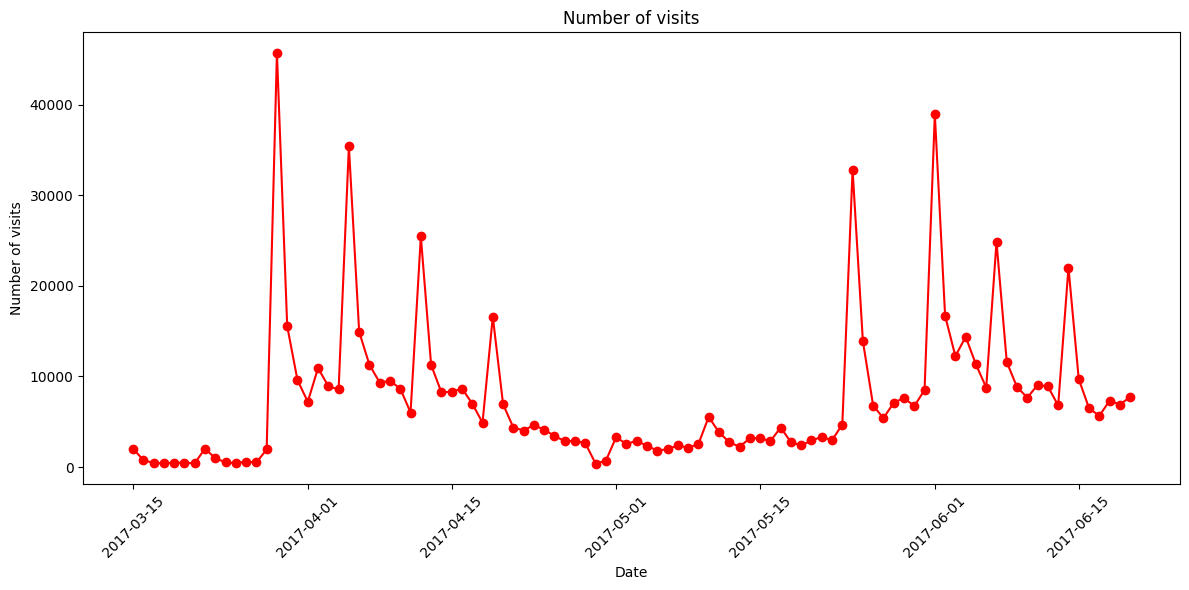

In [137]:
# Visualizar los datos en un gráfico de líneas
plt.figure(figsize=(12, 6))
plt.plot(entries_per_day['date'], entries_per_day['total_entries'], marker='o', color='red' ,linestyle='-')

# Configurar el título y las etiquetas de los ejes
plt.title('Number of visits')
plt.xlabel('Date')
plt.ylabel('Number of visits')
plt.xticks(rotation=45)

# Mostrar el gráfico
plt.tight_layout()
plt.show()

**3. Additional Data Needs**
- What other data, if available, could enhance the analysis?

I think that the bullets points below coul enhance the analysis:

- **User Demographics**: Understanding the demographic characteristics of users participating in the test could provide insights into how different demographic groups respond to the changes being tested.

- **User Feedback**: Gathering qualitative feedback from users through surveys, interviews, or user feedback channels can provide valuable insights into user perceptions, preferences, and reasons behind their behavior.

- **Long-term Impact**: Evaluating the long-term impact of the changes beyond the duration of the A/B test can provide insights into whether the observed effects are sustainable over time.


In [138]:
pip install statsmodels

Note: you may need to restart the kernel to use updated packages.
